# PHYS 481 Assignment 6: Random Walk
## Fri Nov 10 23:59

### Monica A. Bellamy (3009896)
### Sachin Sharma (30118711)
### Max Stronge (30064749) 

Remember to write an introduction [2 pts] and conclusion [2 pts].

In [1]:
# Load standard libraries for numerical methods and plotting.
# This same block will start almost every assignment in PHYS 481.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction
------------
<span style="color:palevioletred;"> This assignment explores various models of Brownian motion. We simulate different scenarios, including basic random walks, modified probabilities, Gaussian step lengths, and complex step length distributions, and plot histograms of normalized displacements at various time intervals. This allows us to understand how model assumptions affect the behavior of particles undergoing Brownian motion over time.

## Question 1 [4 pts]

A grain of pollen suspended in a liquid undergoes Brownian motion. In each time interval d𝑡, assume it
has an equal probability of moving a distance ℓ to the left or ℓ to the right (an admittedly simplistic
model). Model this as a random walk and simulate an ensemble of several thousand trials. Plot a
histogram of the normalized displacement 𝑥/ℓ after 100 d𝑡, 500 d𝑡, 1000 d𝑡 and 10000 d𝑡. Include the
analytic probability on the graph using the Central Limit Theorem. Comment on your plot. How does the
width of the distribution scale with time?

In [86]:
# # This was my first attempt to visualize what the code does intuitively
# def brownian_motion(dt):
#     displacements_single_trial = []  # for 1 trial up to 4
#     # This runs through all the trials
#     for _ in range(num_trials):
#         location = 0  # This keeps track of the location of the grain of pollen
#         # This loop calculates each time step
#         for _ in range(dt): 
#             if np.random.rand() > 0.5:  # half of the random numbers will indicate right or left basically
#                 location += 1           # Notice that were using 0.5 just like the unbaised value. Turns out
#             else:                       # there's a reason why unbaised = 0.5.
#                 location -= 1
#         displacements_single_trial.append(location)  # combine the data
#     return displacements_single_trial

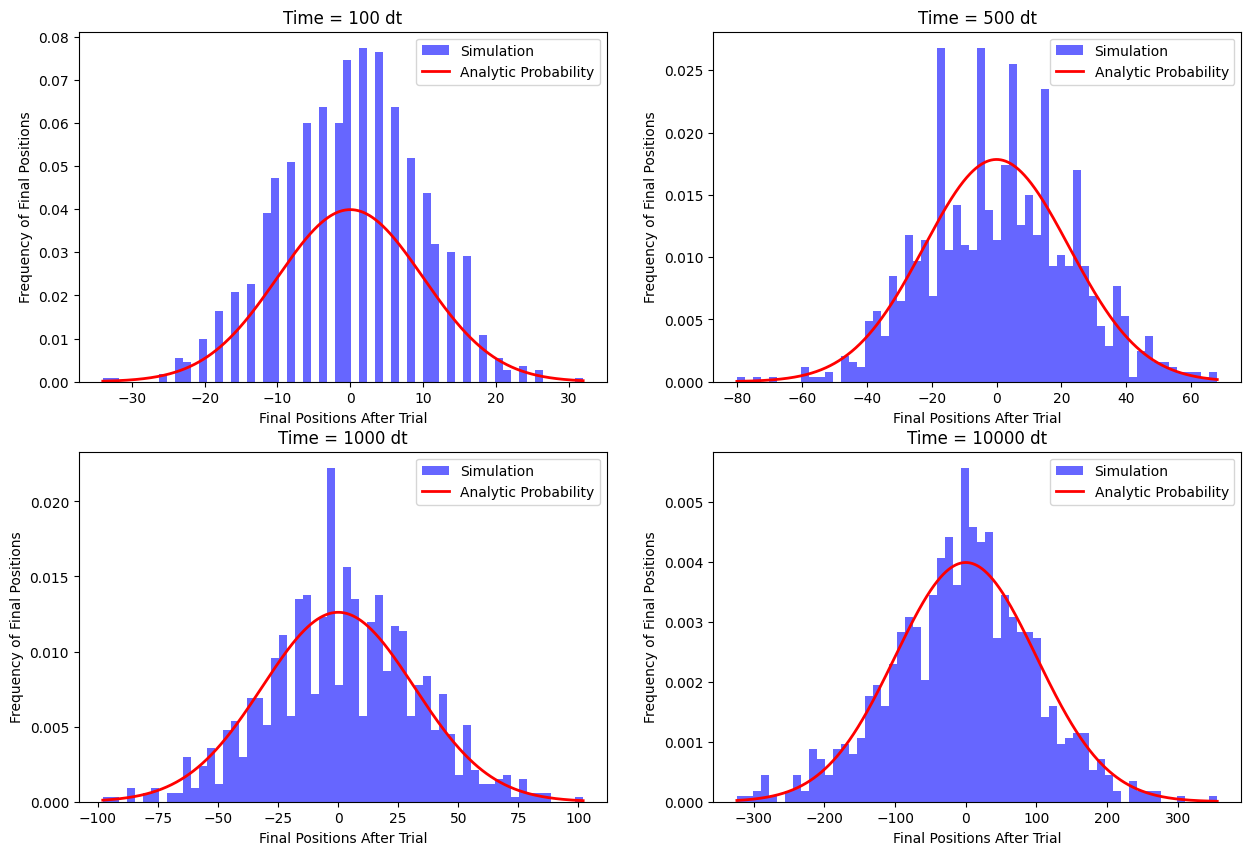

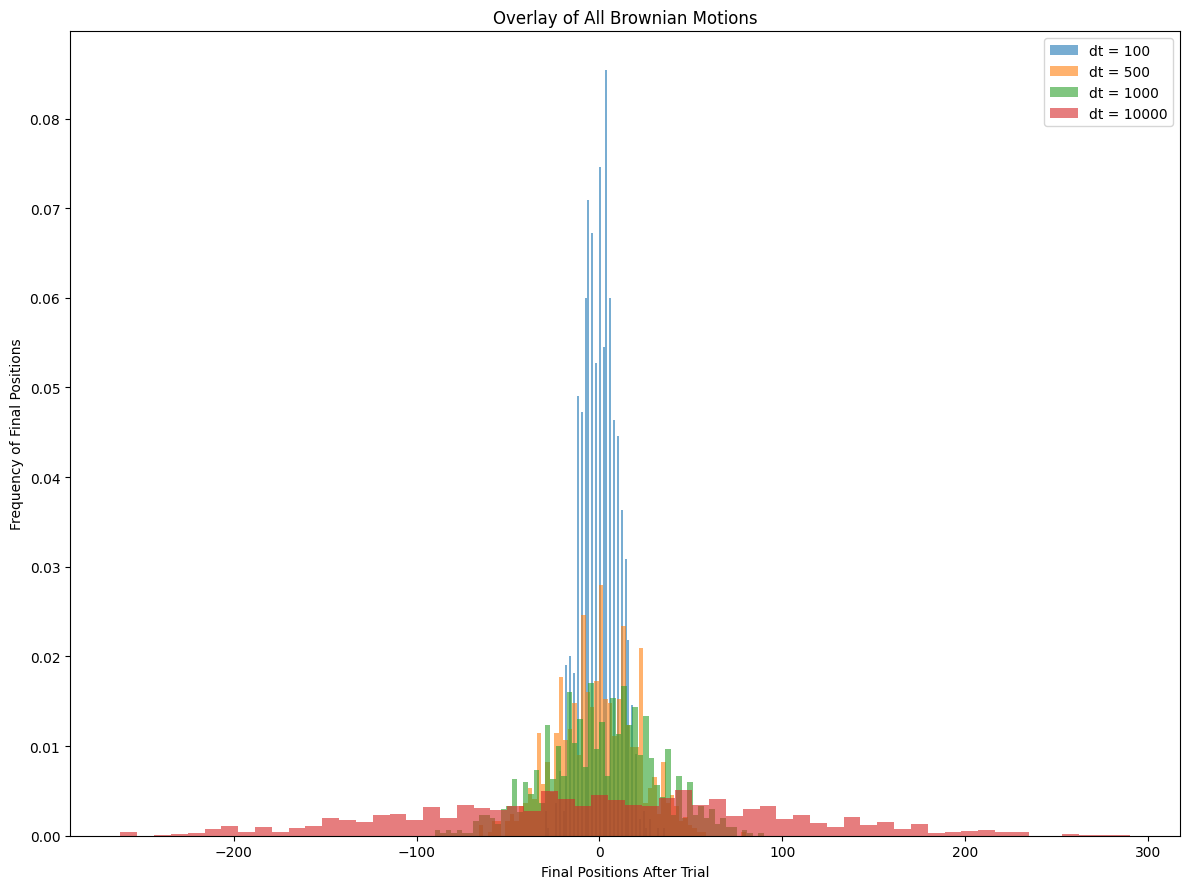

In [2]:
# Question 1

# Define our variables and constants from assignment
num_trials = 1000
time_intervals = [100, 500, 1000, 10000]  # This represents N
q = 0.5                                   # This represents the bias (0.5 == unbiased)

def brownian_motion(dt, num_trials, q):
    """Simulate Brownian motion for a specified time interval but the method is vectorized according to last slide
    in the lecture notes so that it iterates 50x faster.

    Note: How does it work? (random_steps > q) is a boolean with True or False but when you multiply a boolean by some integer
    python automatically assigns them a value of 1 or 0 respectively. We can use this to get a step to the left or right by
    using the equation below. E.g. For True: 2(1)-1 = 1, while for False: 2(0)-1 = -1 !!!

    Args:
    - dt (int): Time interval for the simulation.
    - num_trials (int): The number of trials to run.
    - q (float): The bias parameter for the unbiased walk.

    Returns: A list of displacements for multiple trials AKA the entire data for 1 graph.
    """
    # Create an array of random steps for all trials and time intervals
    random_steps = np.random.rand(num_trials, dt)
    
    # Calculate the displacements using vectorized operations
    steps = 2 * (random_steps < q) - 1
    displacements_all_trials = np.sum(steps, axis=1)

    return displacements_all_trials

def plot_brownian_motion(time_intervals, num_trials, q):
    """Plot histograms and analytical probability curves p(x) for Brownian motion simulations.

    Args:
    - time_intervals (list): List of time intervals (N) for simulations.
    - num_trials (int): The number of trials to simulate.
    - q (float): The bias parameter for the unbiased walk.
    """
    # Create the figure(s) for ploting all four of the time_intervals 
    plt.figure(figsize=(15, 10))
    
    # Iterate over each different time intervals, so this loop happens 4 times total so 100, 500, 1000, 10000.
    # Here, i represents 1,2,3,4 while dt represents the actual values in time_intervals = [...]
    for i, dt in enumerate(time_intervals):
        plt.subplot(2, 2, i + 1)

        # Simulate Brownian motion for the current time interval by calling helper function
        data = brownian_motion(dt, num_trials, q)
        # Plot a histogram of the simulation data from brownian motion
        plt.hist(data, bins=60, density=True, alpha=0.6, color='b', label='Simulation')

        # Generate x values based on the range of your data
        x = np.linspace(min(data), max(data), num=1000)
        N = dt  # This is just to follow the formula given in the notes

        # Calculate parameters for the analytic probability from lecture notes
        mu = N * (2 * q - 1)
        sigma = 2 * np.sqrt(N * q * (1 - q))
        
        # Calculate the analytical probability using the Central Limit Theorem
        analytic_prob = 1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
        
        # Plot the analytical probability curve
        plt.plot(x, analytic_prob, 'r', lw=2, label='Analytic Probability')
        plt.title(f'Time = {dt} dt')
        plt.xlabel('Final Positions After Trial')
        plt.ylabel('Frequency of Final Positions')
        plt.legend()

    # Create the fifth plot to overlay all Brownian motion data in different colors
    plt.figure(figsize=(12,9))
    for i, dt in enumerate(time_intervals):
        data = brownian_motion(dt, num_trials, q)
        plt.hist(data, bins=60, density=True, alpha=0.6, label=f'dt = {dt}')
    plt.title('Overlay of All Brownian Motions')
    plt.xlabel('Final Positions After Trial')
    plt.ylabel('Frequency of Final Positions')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the helper function to plot the data
plot_brownian_motion(time_intervals, num_trials, q)

___Comments #1___
-----------------
Comment on your plots. How does the width of the distribution scale with time?

<span style="color:palevioletred;"> The width of the distribution in the Brownian motion simulations scales with time by becoming progressively broader as the time interval increases. In the provided plots, as the time intervals (N) grow from 100 to 10000, the histograms of final positions exhibit increasing dispersion, indicative of greater variability in the outcomes. This observation aligns with the Central Limit Theorem, which states that as the number of random steps (time intervals) increases, the distribution of final positions approaches a Gaussian (normal) distribution with a wider spread, demonstrating the characteristic scaling behavior of Brownian motion.

## Question 2 [2 pts]

Repeat question 1 but assume the probability of moving to the right in time interval d𝑡 is 60% (instead of
50% as in question 1). Plot a histogram of the normalized displacement after 100 d𝑡, 500 d𝑡, 900 d𝑡 and
1300 d𝑡. Include the analytic probability on the graph using the Central Limit Theorem. Comment on
your plot. How does the width and central position of the distribution scale with time? What physical
situation might this correspond to?

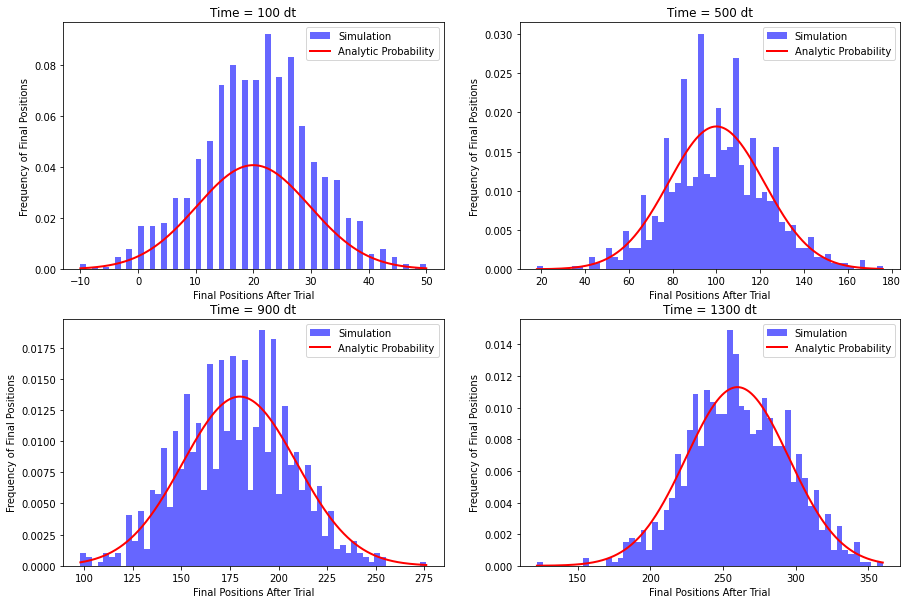

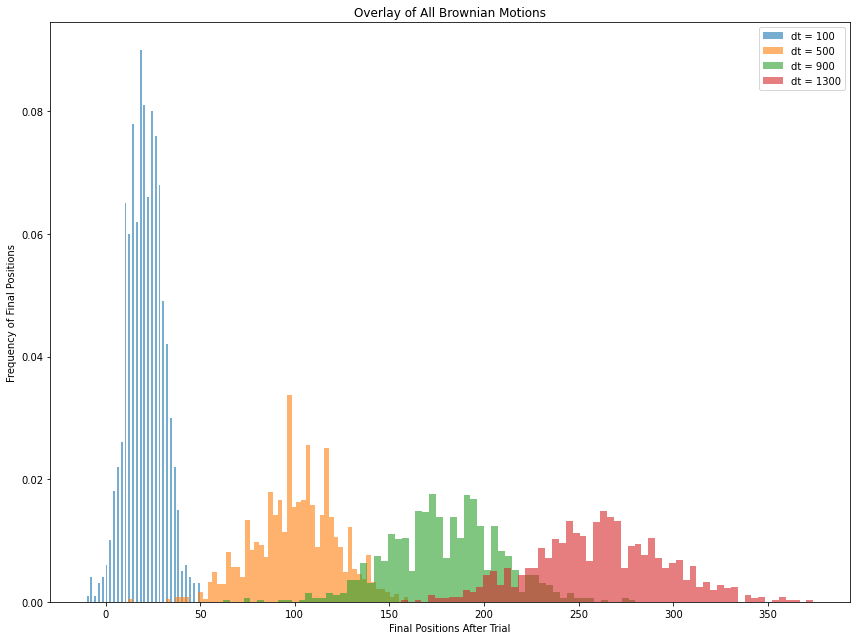

In [116]:
# Question 2

# Note: For this question, I basically copy + pasted the same code as Question 1 but changed the q value to 0.6. I also
# realized that I originally had the inequality in the 'brownian_motion()' function the wrong way as > but I changed
# it to < to match the convention of q since its 0.6 bais to the right. I also changed the inequality in Question 1 even
# though it makes no difference in the previous results since there is no bais.

# Define our variables and constants from assignment
num_trials = 1000
time_intervals = [100, 500, 900, 1300]  # This represents N
q = 0.6                                 # This represents the bias (0.5 == unbiased)

def brownian_motion(dt, num_trials, q):
    """Simulate Brownian motion for a specified time interval but the method is vectorized according to last slide
    in the lecture notes so that it iterates 50x faster.

    Note: How does it work? (random_steps > q) is a boolean with True or False but when you multiply a boolean by some integer
    python automatically assigns them a value of 1 or 0 respectively. We can use this to get a step to the left or right by
    using the equation below. E.g. For True: 2(1)-1 = 1, while for False: 2(0)-1 = -1 !!!

    Args:
    - dt (int): Time interval for the simulation.
    - num_trials (int): The number of trials to run.
    - q (float): The bias parameter for the unbiased walk.

    Returns: A list of displacements for multiple trials AKA the entire data for 1 graph.
    """
    # Create an array of random steps for all trials and time intervals
    random_steps = np.random.rand(num_trials, dt)
    
    # Calculate the displacements using vectorized operations
    steps = 2 * (random_steps < q) - 1
    displacements_all_trials = np.sum(steps, axis=1)

    return displacements_all_trials

def plot_brownian_motion(time_intervals, num_trials, q):
    """Plot histograms and analytical probability curves p(x) for Brownian motion simulations.

    Args:
    - time_intervals (list): List of time intervals (N) for simulations.
    - num_trials (int): The number of trials to simulate.
    - q (float): The bias parameter for the unbiased walk.
    """
    # Create the figure(s) for ploting all four of the time_intervals 
    plt.figure(figsize=(15, 10))
    
    # Iterate over each different time intervals, so this loop happens 4 times total so 100, 500, 1000, 10000.
    # Here, i represents 1,2,3,4 while dt represents the actual values in time_intervals = [...]
    for i, dt in enumerate(time_intervals):
        plt.subplot(2, 2, i + 1)

        # Simulate Brownian motion for the current time interval by calling helper function
        data = brownian_motion(dt, num_trials, q)
        # Plot a histogram of the simulation data from brownian motion
        plt.hist(data, bins=60, density=True, alpha=0.6, color='b', label='Simulation')

        # Generate x values based on the range of your data
        x = np.linspace(min(data), max(data), num=1000)
        N = dt  # This is just to follow the formula given in the notes

        # Calculate parameters for the analytic probability from lecture notes
        mu = N * (2 * q - 1)
        sigma = 2 * np.sqrt(N * q * (1 - q))
        
        # Calculate the analytical probability using the Central Limit Theorem
        analytic_prob = 1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
        
        # Plot the analytical probability curve
        plt.plot(x, analytic_prob, 'r', lw=2, label='Analytic Probability')
        plt.title(f'Time = {dt} dt')
        plt.xlabel('Final Positions After Trial')
        plt.ylabel('Frequency of Final Positions')
        plt.legend()

    # Create the fifth plot to overlay all Brownian motion data in different colors
    plt.figure(figsize=(12,9))
    for i, dt in enumerate(time_intervals):
        data = brownian_motion(dt, num_trials, q)
        plt.hist(data, bins=60, density=True, alpha=0.6, label=f'dt = {dt}')
    plt.title('Overlay of All Brownian Motions')
    plt.xlabel('Final Positions After Trial')
    plt.ylabel('Frequency of Final Positions')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the helper function to plot the data
plot_brownian_motion(time_intervals, num_trials, q)

___Comments #2___
-----------------
Comment on your plot. How does the width and central position of the distribution scale with time? What physical situation might this correspond to?

<span style="color:palevioletred;"> The width of the distribution in the Brownian motion simulations increases with time, which is the behavior observed in Question 1. As the time intervals (N) extend from 100 to 1300, the histograms exhibit progressively broader spreads, indicative of greater dispersion in the final positions. The central position of the distribution also shifts to the right of x=0 due to the increased bias (q=0.6) toward rightward movement. This shift corresponds to a physical situation where the Brownian particle is more likely to move in a specific direction (to the right, in this case) with a higher probability, resulting in a net displacement in that direction over time. The wider distribution reflects the increased variability in the final positions due to longer observation periods. This scenario aligns with real-world situations where particles or molecules experience an asymmetric environment, influencing their directional motion and contributing to the observed trends in width and central position.

## Question 3 [2 pts]

A more realistic approximation for Brownian motion is that in each time interval d𝑡, the pollen moves a
distance 𝑑 that obeys a Gaussian distribution. Assuming the Gaussian distribution for the step length has
𝜇 = 0.2ℓ and 𝜎 = ℓ, plot a histogram of the normalized displacement after 100 d𝑡, 500 d𝑡, 900 d𝑡 and
1300 d𝑡, including the analytic probability. Comment on your plot. How does the width and central
position of the distribution scale with time?

In [ ]:
# Question 3

___Comments #3___
-----------------
Comment on your plot. How does the width and central position of the distribution scale with time?

<span style="color:palevioletred;"> Stuff

## Question 4 [4 pts]

Let’s say the step distance 𝑑 is instead chosen from the intentionally arbitrary function

$𝑑/ℓ = (2𝑢 − 1)^3 + 0.2$

where 𝑢 is uniformly distributed on [0,1]. Start by generating a large sample of step lengths 𝑑/ℓ. Plot a
histogram of the step length and calculate the mean and variance. Then plot a histogram of the
normalized displacement after 100 d𝑡, 500 d𝑡, 900 d𝑡 and 1300 d𝑡, including the analytic probability.
(using your estimated mean and variance). Comment on your plot. How sensitive is the motion to the
exact details of the step distribution?

In [ ]:
# Question 4

"""I'm doing this one - Sachin"""

___Comments #4___
-----------------
Comment on your plot. How sensitive is the motion to the exact details of the step distribution?

<span style="color:palevioletred;"> Stuff

## Conclusion
------------
<span style="color:palevioletred;"> Stuff